In [4]:
import numpy as np
import pandas as pd

data = pd.read_csv('SK.csv',header=None)
print(data.shape)
data=data.dropna()
print(data.shape)

(71020, 44)
(71020, 44)


In [5]:
shape=data.shape
N=shape[0]

X = np.zeros((N,13,1))
Ls = np.zeros((N,3,1))


Y = np.zeros((N,13))
LPF = np.zeros((N,1))

for ii in range(0,N):
    q1 = int(data.iloc[ii,0])
    q2 = int(data.iloc[ii,1])
    q3 = int(data.iloc[ii,2])
    
    l1 = data.iloc[ii,3]
    l2 = data.iloc[ii,4]
    l3 = data.iloc[ii,5]

    
    
    
    X[ii,q1,0] = 1
    X[ii,q2,0] = 1
    X[ii,q3,0] = 1
    
    Ls[ii,0,0]=l1*0.01
    Ls[ii,1,0]=l2*0.01
    Ls[ii,2,0]=l3*0.01
    
    Y[ii,:] = data.iloc[ii][[8,10,13,16,19,22,25,28,31,34,37,40,43]]
    LPF[ii,0]= data.iloc[ii][6]

    
xticks=[0,1,2,3,4,5,6,7,8,9,10,11,12]



    

In [6]:
print(X[0])
print(Ls[0])
print(Y[0])


[[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[[2.38]
 [2.38]
 [4.76]]
[ 0.         -0.00360423 -0.00743174 -0.0265086  -0.00496326 -0.00053225
  0.0246471  -0.00157688 -0.00086909 -0.00065182 -0.00043455 -0.00021727
  0.        ]


In [7]:
import keras as krs
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
import matplotlib.pyplot as plt
from keras.utils import plot_model

# define two sets of inputs
inputA = krs.Input(shape=(13,1))
inputB = krs.Input(shape=(3,))

# the first branch operates on the first input
x = Conv1D(128, kernel_size=1, activation="relu")(inputA)
x = Conv1D(64, kernel_size=1, activation="relu")(x)
x = Conv1D(32, kernel_size=1, activation="relu")(x)
x = Conv1D(24, kernel_size=1, activation="relu")(x)
x = Conv1D(13, kernel_size=1, activation="relu")(x)
x = Flatten()(x)
x = Dense(13, activation="relu")(x)
x = krs.Model(inputs=inputA, outputs=x)

print(x.output)

# the second branch opreates on the second input
y = Dense(3, activation="linear")(inputB)
y = krs.Model(inputs=inputB, outputs=y)

print(y.output)

# combine the output of the two branches
combined = krs.layers.concatenate([x.output, y.output])

# apply a FC layer and then a regression prediction on the
# combined outputs
z = Dense(64, activation="relu")(combined)
z = Dense(32, activation="relu")(z)
z = Dense(24, activation="relu")(z)
z = Dense(13, activation="linear")(z)

# our model will accept the inputs of the two branches and
# then output a single value
model = krs.Model(inputs=[x.input, y.input], outputs=z)


model.compile(loss='mean_squared_error', optimizer=krs.optimizers.adam(clipnorm=1))
history1 = model.fit( [X,Ls[:,:,0]], Y, validation_data=([X,Ls[:,:,0]], Y), epochs=100, batch_size=32, verbose=1)  

model.save('SKmodel.h5')
    
    
plt.figure()
# Plot training & validation loss values
plt.plot(history1.history['loss'],label = 'mlp')
  
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

Using TensorFlow backend.
c:\users\nuno\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\nuno\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\nuno\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1




Tensor("dense_1/Relu:0", shape=(?, 13), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 3), dtype=float32)



Train on 71020 samples, validate on 71020 samples
Epoch 1/100
71020/71020 [==============================] - 10s 142us/step - loss: 0.0015 - val_loss: 8.1317e-05
Epoch 2/100
71020/71020 [==============================] - 9s 128us/step - loss: 6.7190e-05 - val_loss: 5.0703e-05
Epoch 3/100
71020/71020 [==============================] - 10s 138us/step - loss: 4.2208e-05 - val_loss: 3.5960e-05
Epoch 4/100
71020/71020 [==============================] - 9s 133us/step - loss: 3.3030e-05 - val_loss: 2.8168e-05
Epoch 5/100
71020/71020 [==============================] - 9s 129us/step - loss: 2.7001e-05 - val_loss: 2.8947e-05
Epoch 6/100
71020/71020 [==============================] - 9s 128us/step - loss: 2.2647e-05 - val_loss: 1.9829e-05
Epoch 7/100
71020/71020 [==============================] - 9s 125us/step - loss: 1.9003e-05 - val_loss: 1.8163e-05
Epoch 8/100
71020/71020 [====

71020/71020 [==============================] - 9s 125us/step - loss: 1.2045e-05 - val_loss: 1.2222e-05
Epoch 59/100
71020/71020 [==============================] - 9s 128us/step - loss: 1.1995e-05 - val_loss: 1.1898e-05
Epoch 60/100
71020/71020 [==============================] - 9s 130us/step - loss: 1.1957e-05 - val_loss: 1.2383e-05
Epoch 61/100
71020/71020 [==============================] - 9s 131us/step - loss: 1.1870e-05 - val_loss: 1.2046e-05
Epoch 62/100
71020/71020 [==============================] - 9s 129us/step - loss: 1.1998e-05 - val_loss: 1.1609e-05
Epoch 63/100
71020/71020 [==============================] - 9s 129us/step - loss: 1.1911e-05 - val_loss: 1.1651e-05
Epoch 64/100
71020/71020 [==============================] - 9s 128us/step - loss: 1.2014e-05 - val_loss: 1.1396e-05
Epoch 65/100
71020/71020 [==============================] - 9s 129us/step - loss: 1.1840e-05 - val_loss: 1.1835e-05
Epoch 66/100
71020/71020 [==============================] - 9s 126us/step - loss: 1.1

<Figure size 640x480 with 1 Axes>

[0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0.] [238. 238. 476.]


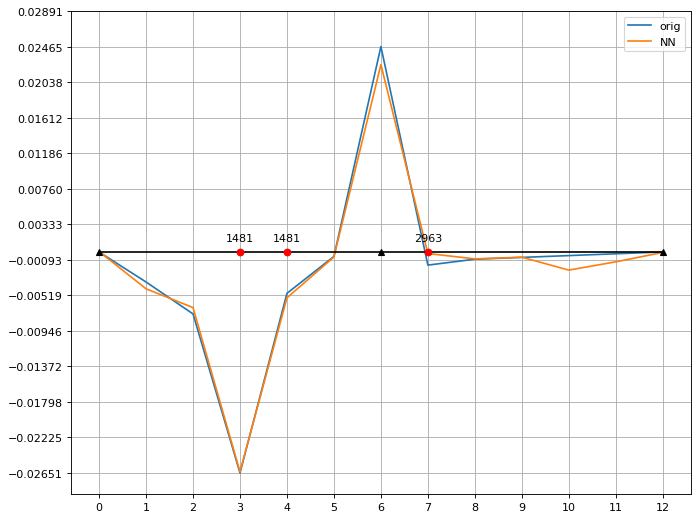

[0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0.] [228. 228. 114.]


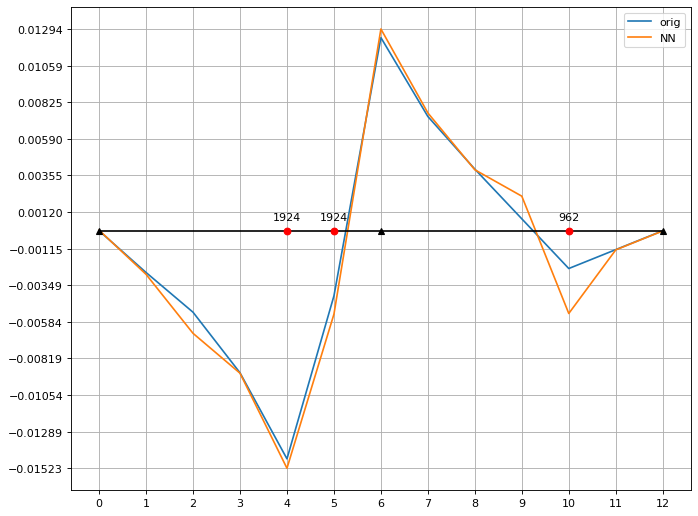

[0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0.] [255.  510.  127.5]


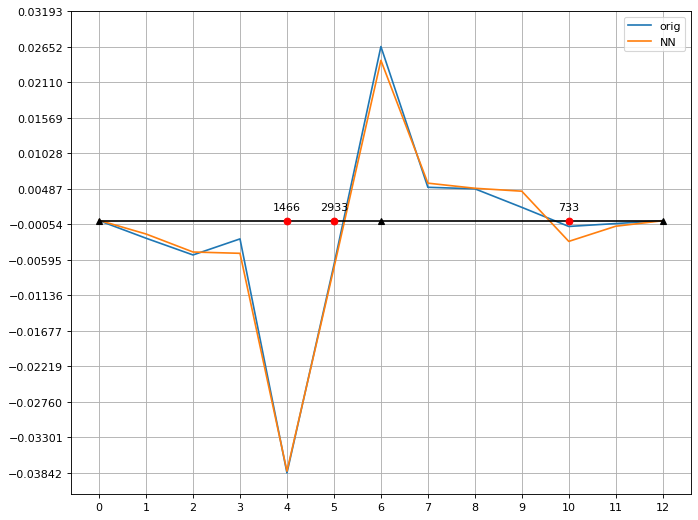

[0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.] [141.   70.5 141. ]


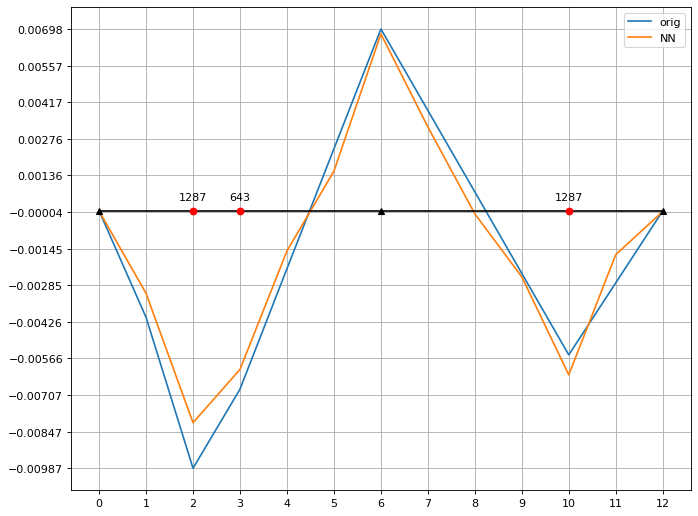

[0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0.] [338. 338. 676.]


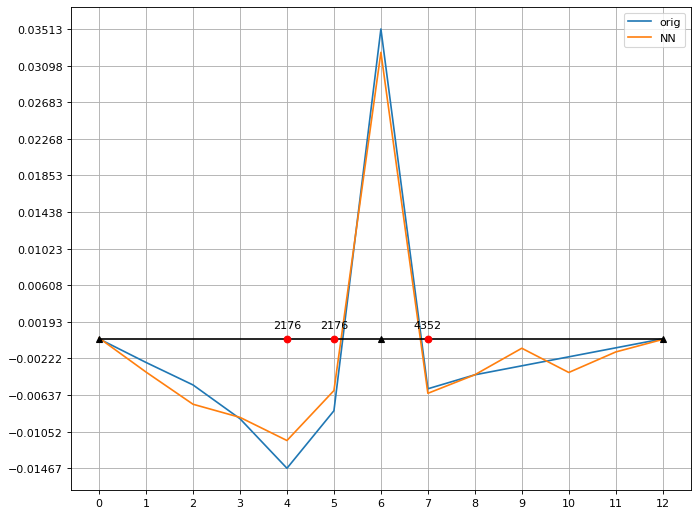

[0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.] [357. 714. 357.]


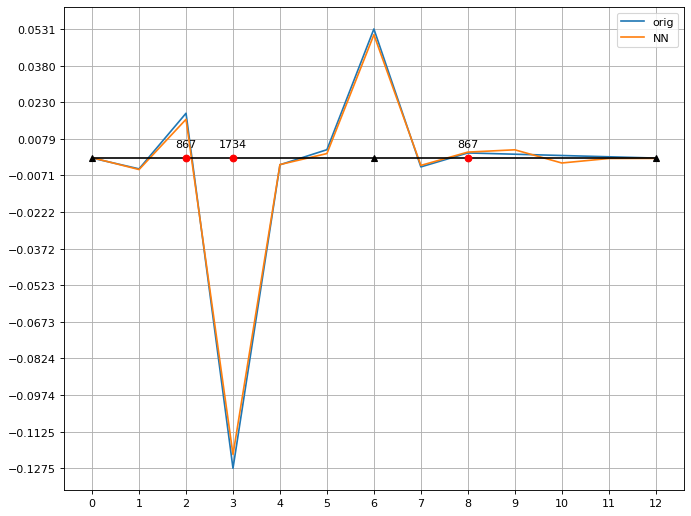

[0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] [118. 236. 236.]


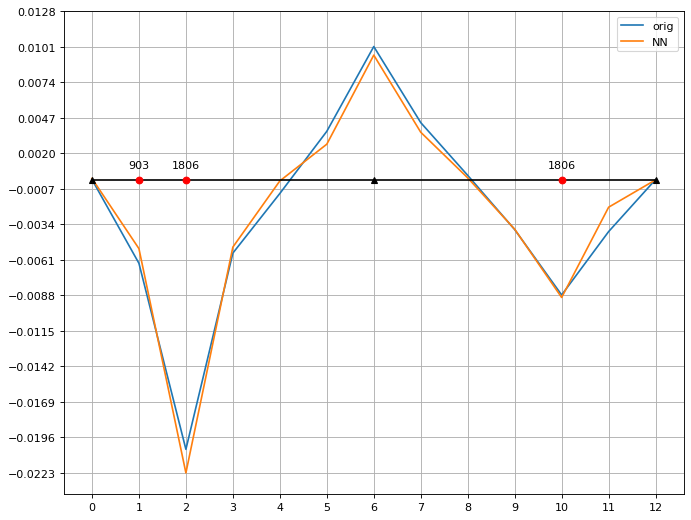

[0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] [38. 19. 38.]


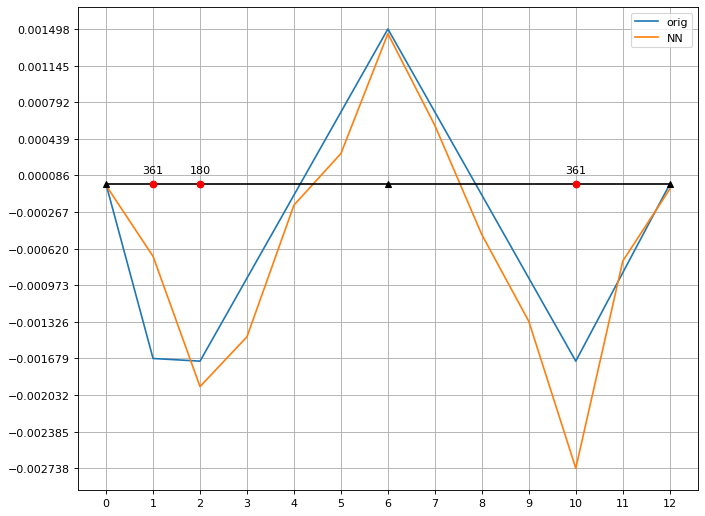

[0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0.] [301.  301.  150.5]


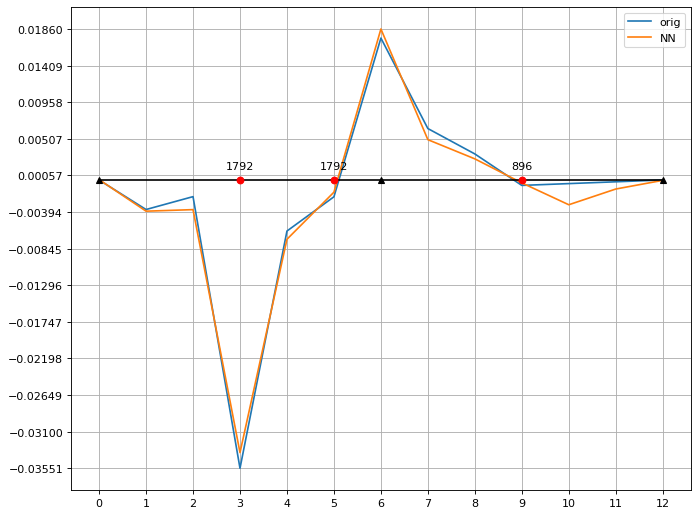

[0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0.] [256. 256. 256.]


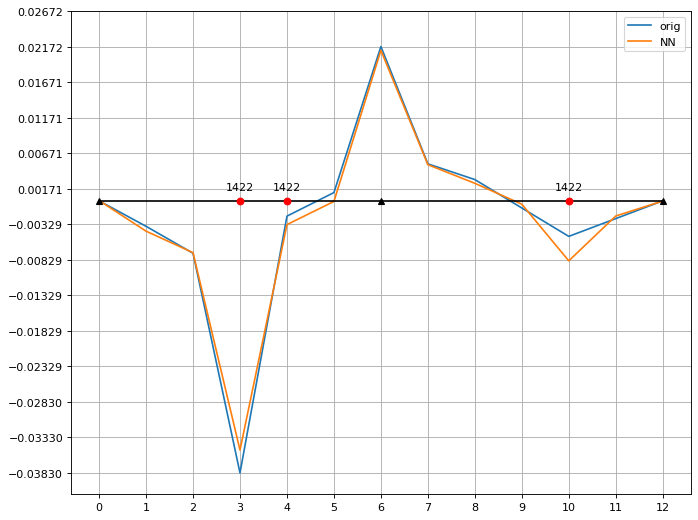

[0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0.] [377.  377.  188.5]


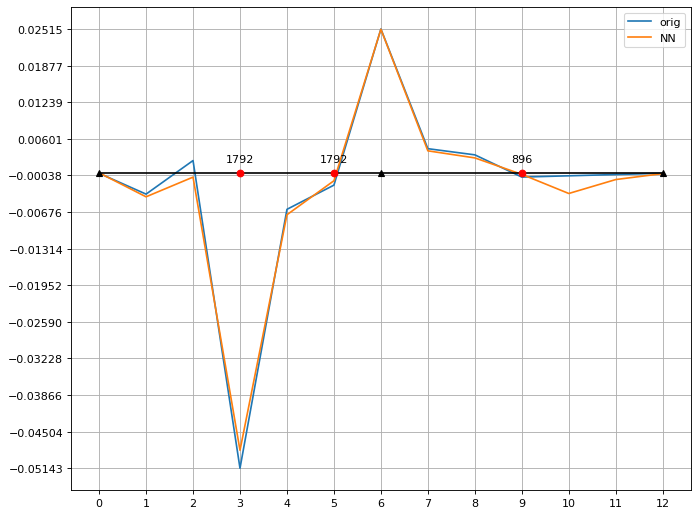

[0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.] [325.  162.5 325. ]


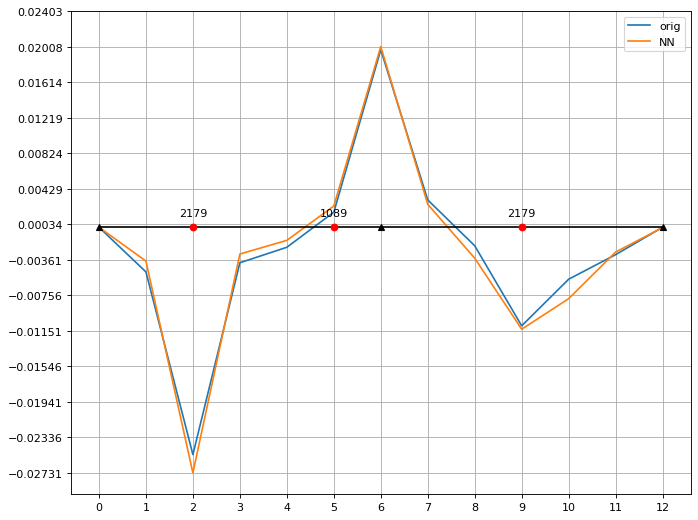

[0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0.] [331.  165.5 662. ]


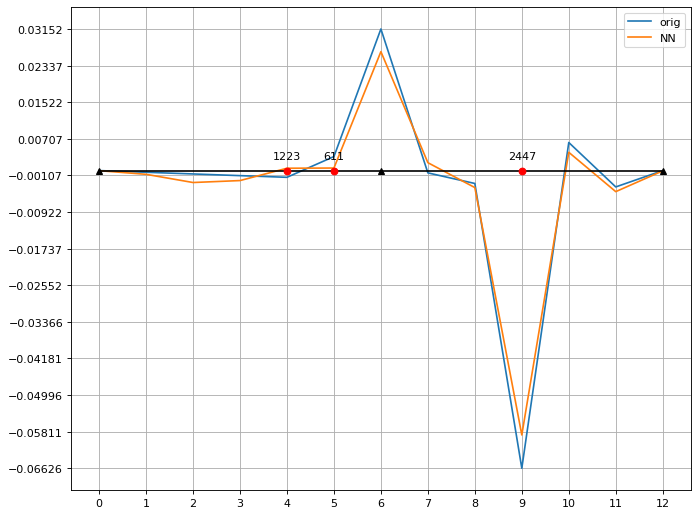

[0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.] [174.  87. 348.]


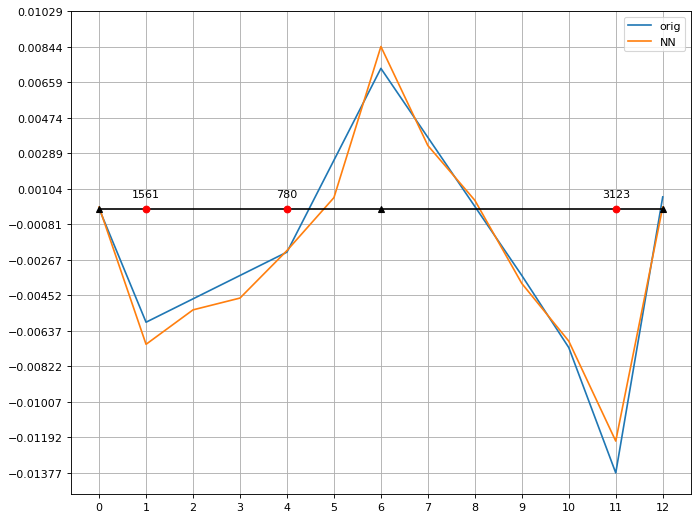

[0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.] [111.  222.   55.5]


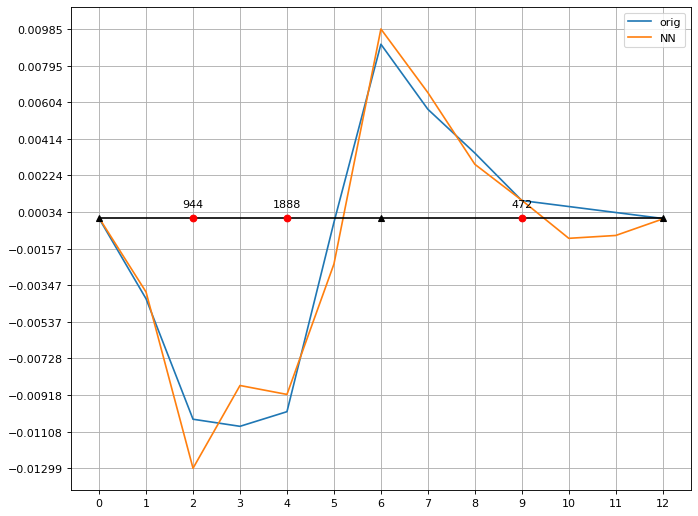

[0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0.] [82. 82. 41.]


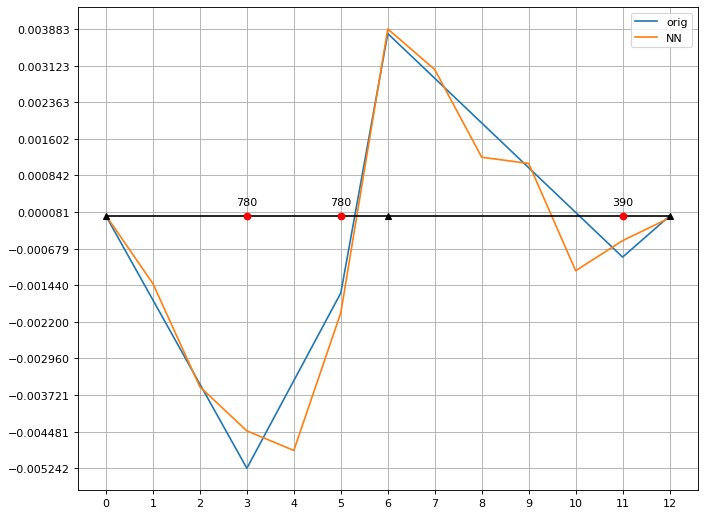

[0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0.] [341.  170.5 341. ]


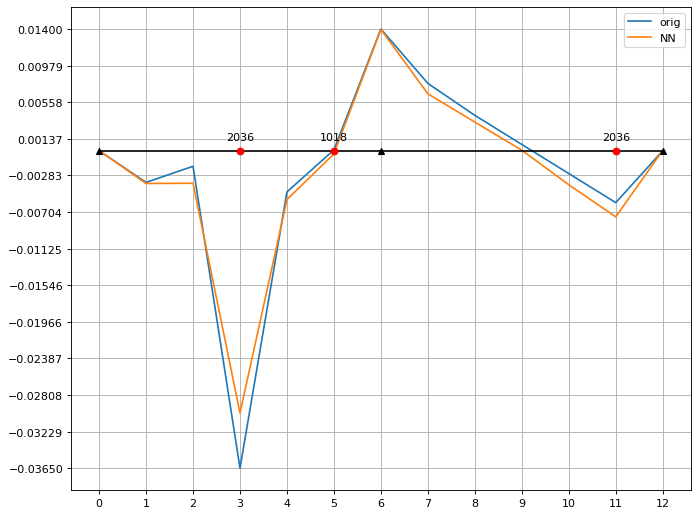

[0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0.] [248. 124. 248.]


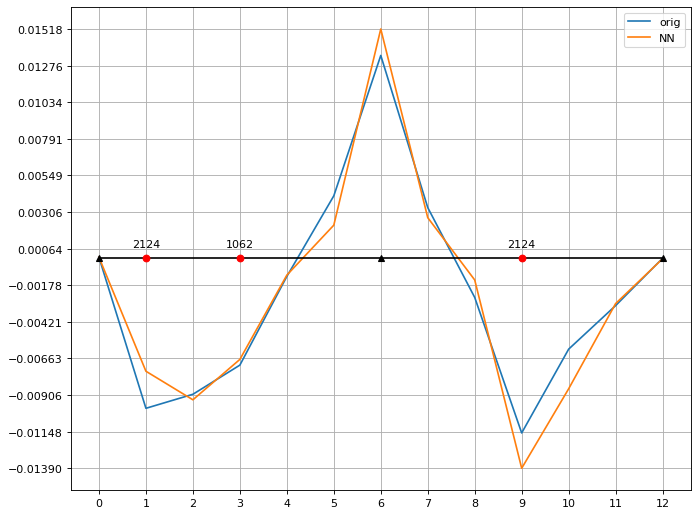

[0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.] [ 91.  182.   45.5]


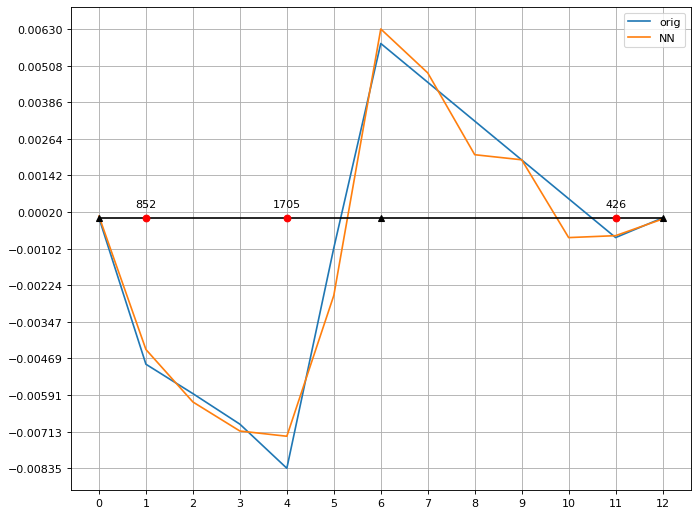

[0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0.] [ 94. 188.  94.]


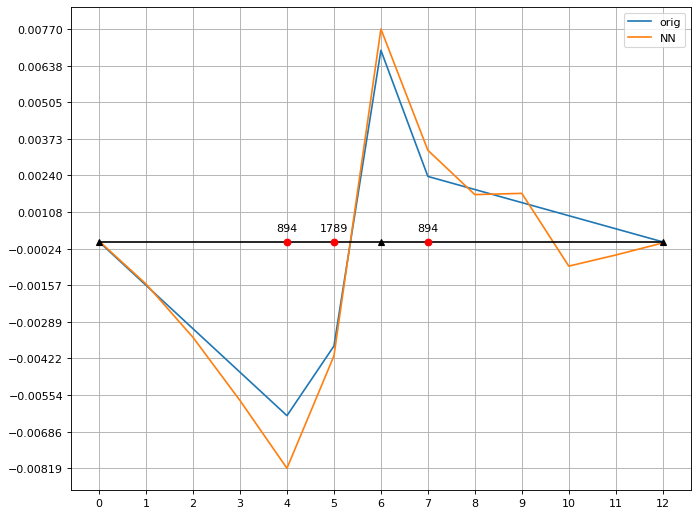

In [8]:
y_pred1 = model.predict([X,Ls[:,:,0]])
import time

from matplotlib.pyplot import figure


for ii in range(20):
    figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
    print(X[ii,:,0],Ls[ii,:,0]*100)
    
    maximo = max([max(y_pred1[ii,:]),max(Y[ii,:])])
    minimo = min([min(y_pred1[ii,:]),min(Y[ii,:])])
        
    plt.plot(Y[ii,:],label='orig')
    plt.plot(y_pred1[ii,:],label='NN')
    #plt.plot(Y[ii,:]-y_pred1[ii,:],label='error')
    
    plt.plot([0,0,0,0,0,0,0,0,0,0,0,0,0],'k-')
    plt.plot([0,6,12],[0,0,0],'^k')
    loads=np.where(X[ii,:,0]==1)[0]
    plt.plot(loads,[0,0,0],'ro')
    
    for i in range(0,3):
        plt.annotate(int(Ls[ii,i,0]*LPF[ii,0]*100), # this is the text
        (loads[i],0), # this is the point to label
        textcoords="offset points", # how to position the text
        xytext=(0,10), # distance from text to points (x,y)
        ha='center') # horizontal alignment can be left, right or center

        
    stepd=(maximo-minimo)/12.0
    plt.yticks(np.arange(minimo, maximo +stepd ,step=stepd))
    plt.xticks(xticks)
    plt.legend()
    plt.grid()
    plt.show()
    time.sleep(2) 
    plt.close()

In [9]:

np.set_printoptions(precision=3)



err = np.sum(np.abs(y_pred1-Y)/N,axis=0)
print("errors1\n ", err)





errors1
  [4.071e-05 7.250e-04 1.771e-03 1.875e-03 1.219e-03 1.262e-03 1.630e-03
 9.341e-04 9.710e-04 1.056e-03 2.167e-03 1.065e-03 5.551e-05]


In [10]:
Pos = np.zeros((13,13,1))
Pesos_05 = np.zeros((13,3,1))
Pesos_1 = np.zeros((13,3,1))
Pesos_2 = np.zeros((13,3,1))

for i in range(13):
    Pos[i,2,0] = 1
    Pos[i,4,0] = 1
    Pos[i,9,0] = 1
    Pesos_05[i,0,0] = 30*(i+1)*0.01
    Pesos_05[i,1,0] = 30*(i+1)/2*0.01
    Pesos_05[i,2,0] = 30*(i+1)/2*0.01
    Pesos_1[i,0,0] = 30*(i+1)*0.01
    Pesos_1[i,1,0] = 30*(i+1)*0.01
    Pesos_1[i,2,0] = 30*(i+1)*0.01
    Pesos_2[i,0,0] = 30*(i+1)*0.01
    Pesos_2[i,1,0] = 30*(i+1)*2*0.01
    Pesos_2[i,2,0] = 30*(i+1)*2*0.01
    
    
Inc_SK_05 = model.predict([Pos,Pesos_05[:,:,0]])
Inc_SK_1 = model.predict([Pos,Pesos_1[:,:,0]])
Inc_SK_2 = model.predict([Pos,Pesos_2[:,:,0]])
print(Pesos_05)
print(Pesos_1)
print(Pesos_2)

[[[0.3 ]
  [0.15]
  [0.15]]

 [[0.6 ]
  [0.3 ]
  [0.3 ]]

 [[0.9 ]
  [0.45]
  [0.45]]

 [[1.2 ]
  [0.6 ]
  [0.6 ]]

 [[1.5 ]
  [0.75]
  [0.75]]

 [[1.8 ]
  [0.9 ]
  [0.9 ]]

 [[2.1 ]
  [1.05]
  [1.05]]

 [[2.4 ]
  [1.2 ]
  [1.2 ]]

 [[2.7 ]
  [1.35]
  [1.35]]

 [[3.  ]
  [1.5 ]
  [1.5 ]]

 [[3.3 ]
  [1.65]
  [1.65]]

 [[3.6 ]
  [1.8 ]
  [1.8 ]]

 [[3.9 ]
  [1.95]
  [1.95]]]
[[[0.3]
  [0.3]
  [0.3]]

 [[0.6]
  [0.6]
  [0.6]]

 [[0.9]
  [0.9]
  [0.9]]

 [[1.2]
  [1.2]
  [1.2]]

 [[1.5]
  [1.5]
  [1.5]]

 [[1.8]
  [1.8]
  [1.8]]

 [[2.1]
  [2.1]
  [2.1]]

 [[2.4]
  [2.4]
  [2.4]]

 [[2.7]
  [2.7]
  [2.7]]

 [[3. ]
  [3. ]
  [3. ]]

 [[3.3]
  [3.3]
  [3.3]]

 [[3.6]
  [3.6]
  [3.6]]

 [[3.9]
  [3.9]
  [3.9]]]
[[[0.3]
  [0.6]
  [0.6]]

 [[0.6]
  [1.2]
  [1.2]]

 [[0.9]
  [1.8]
  [1.8]]

 [[1.2]
  [2.4]
  [2.4]]

 [[1.5]
  [3. ]
  [3. ]]

 [[1.8]
  [3.6]
  [3.6]]

 [[2.1]
  [4.2]
  [4.2]]

 [[2.4]
  [4.8]
  [4.8]]

 [[2.7]
  [5.4]
  [5.4]]

 [[3. ]
  [6. ]
  [6. ]]

 [[3.3]
  [6.6]
  [6.6]]


In [30]:
SK05 =  pd.read_csv('sk_alpha05_beta05.csv', header=None)
SK1 =  pd.read_csv('sk_alpha1_beta1.csv', header=None)
SK2 =  pd.read_csv('sk_alpha2_beta2.csv', header=None)

sk05=[]
sk1=[]
sk2=[]

load05=[]
load1=[]
load2=[]
for i in range(0,13):
    load05.append(int(SK05.iloc[i][3]*SK05.iloc[i][6]))
    load1.append(int(SK1.iloc[i][3]*SK1.iloc[i][6]))
    load2.append(int(SK2.iloc[i][3]*SK2.iloc[i][6]))
    
    sk05.append(SK05.iloc[i][[8,10,13,16,19,22,25,28,31,34,37,40,43]])
    sk1.append(SK1.iloc[i][[8,10,13,16,19,22,25,28,31,34,37,40,43]])
    sk2.append(SK2.iloc[i][[8,10,13,16,19,22,25,28,31,34,37,40,43]])
    
    
import math
def soma(a):
    print(a)
    out=0
    for i in a:
        if i!= math.inf:
            out+=i
        
    return out
    

def make_graph(_xx,_var,sk,_load,_title):
 
    figure(num=None, figsize=(12, 9), dpi=80, facecolor='w', edgecolor='k')
    maxes=[]
    mins=[]
    for i in range(12,13):
        maxes.append(max(max(_var[i]),max(sk[i])))
        mins.append(min(min(_var[i]),min(sk[i])))
        plt.plot(_xx,_var[i],'b') 
        #plt.plot(_xx,sk[i],'b',label=s'Original')

    stepd=(max(maxes)-min(mins))/20.0
    plt.yticks(np.arange(min(mins), max(maxes)+stepd ,step=stepd))
    plt.xticks(xticks)
    plt.grid(True)
    
    plt.title(_title,fontsize=20)

    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    plt.close()
    

    
    err =err = np.sum(np.abs((_var-sk)/sk*100)/12,axis=0)
    print('Posição \t Erro Relativo Médio')
    for i in range(13):
        print(str(i)+" metros \t"+str(err[i].round(2))+'%')
    

    print(soma(np.abs((_var[0][1:12]-sk[0][1:12])/sk[0][1:12]*100))/11)

            
    
    


No handles with labels found to put in legend.


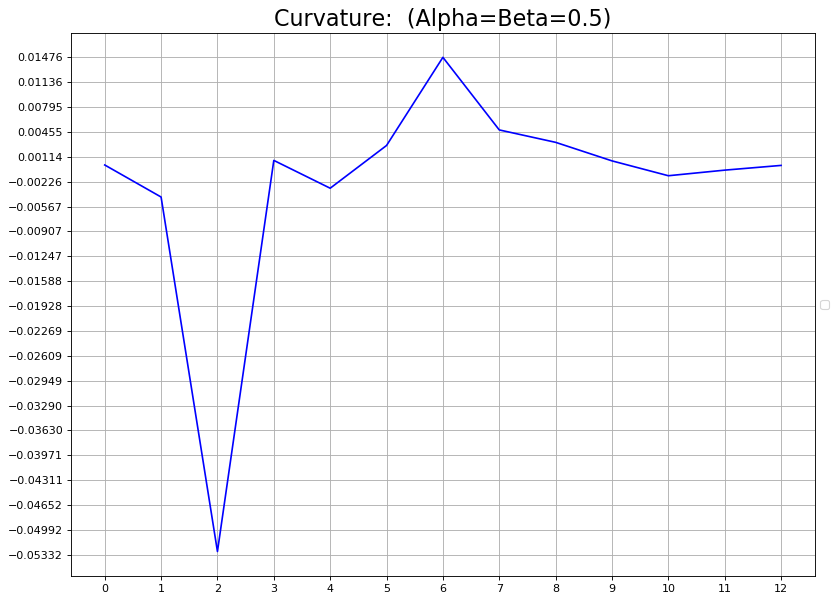

Posição 	 Erro Relativo Médio
0 metros 	inf%
1 metros 	16.97%
2 metros 	4.35%
3 metros 	25.52%
4 metros 	13.68%
5 metros 	88.08%
6 metros 	8.7%
7 metros 	14.11%
8 metros 	45.52%
9 metros 	57.18%
10 metros 	184.64%
11 metros 	155.08%
12 metros 	inf%
10    26.0265
13    5.74361
16    16.7232
19    37.3992
22    81.2631
25    30.2931
28    20.8466
31    246.299
34    19.1765
37    796.198
40    411.375
Name: 0, dtype: object
153.7585551664381


c:\users\nuno\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:57: RuntimeWarning: divide by zero encountered in double_scalars


In [31]:
make_graph(xticks,Inc_SK_05,sk05,load05, 'Curvature:  (Alpha=Beta=0.5)')


No handles with labels found to put in legend.


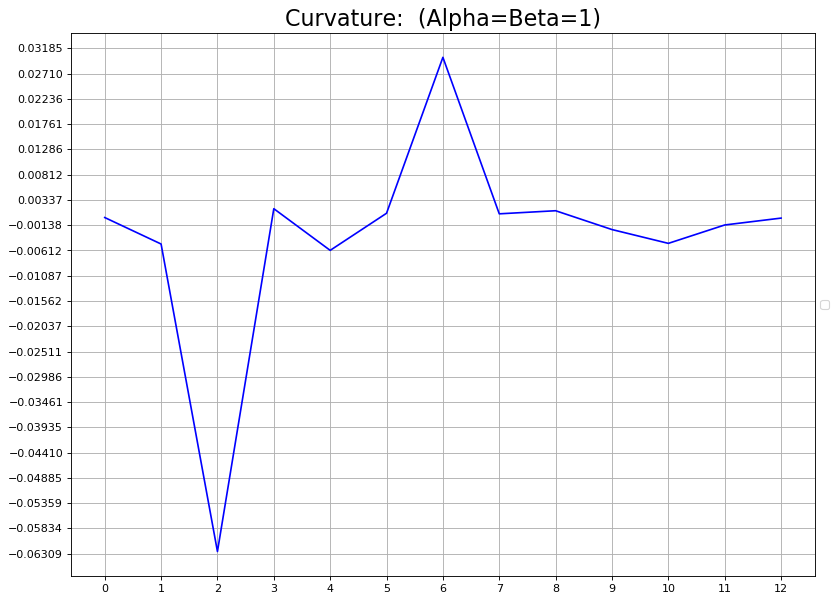

Posição 	 Erro Relativo Médio
0 metros 	inf%
1 metros 	14.06%
2 metros 	7.33%
3 metros 	28.88%
4 metros 	18.68%
5 metros 	103.72%
6 metros 	6.73%
7 metros 	15.03%
8 metros 	294.73%
9 metros 	20.59%
10 metros 	53.17%
11 metros 	20.74%
12 metros 	inf%
10    20.9982
13    11.0009
16    14.6062
19    38.5236
22    101.297
25    23.0642
28    21.1429
31    680.356
34    20.5942
37     187.39
40    101.689
Name: 0, dtype: object
110.96925177604376


c:\users\nuno\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:57: RuntimeWarning: divide by zero encountered in double_scalars


In [32]:
make_graph(xticks,Inc_SK_1,sk1,load1,'Curvature:  (Alpha=Beta=1)')

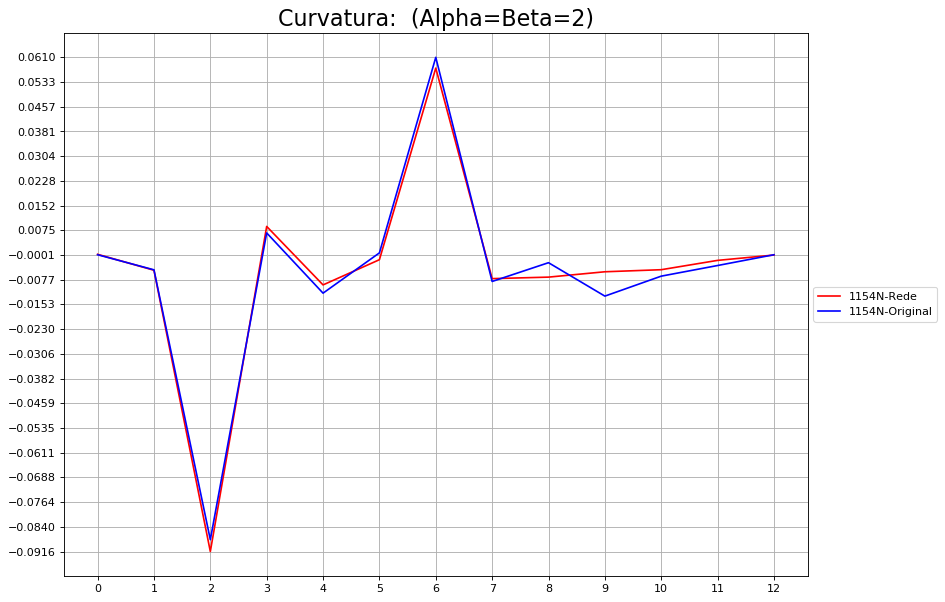

Posição 	 Erro Relativo Médio
0 metros 	inf%
1 metros 	7.05%
2 metros 	13.52%
3 metros 	70.74%
4 metros 	23.09%
5 metros 	420.64%
6 metros 	5.59%
7 metros 	42.06%
8 metros 	133.1%
9 metros 	32.85%
10 metros 	25.42%
11 metros 	21.82%
12 metros 	inf%
10    11.4385
13    20.9838
16    16.0294
19    32.4053
22    122.518
25    21.5829
28    17.6087
31    51.8411
34    5.58022
37    6.58643
40    3.16423
Name: 0, dtype: object
28.158063317865093


c:\users\nuno\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:57: RuntimeWarning: divide by zero encountered in double_scalars


In [14]:
make_graph(xticks,Inc_SK_2,sk2,load2,'Curvatura:  (Alpha=Beta=2)')

In [12]:
sk05[5]

8    -1.16415e-10
10    -0.00447063
13     -0.0122923
16    -0.00735308
19    -0.00469897
22      0.0013899
25     0.00752636
28     0.00440364
31     0.00135404
34    -0.00170832
37    -0.00113888
40   -0.000569441
43   -1.45519e-11
Name: 5, dtype: object

In [1]:
condition=data.iloc[np.where(data.iloc[:][0]==1)]
condition=condition.iloc[np.where(condition.iloc[:][1]==5)]
condition=condition.iloc[np.where(condition.iloc[:][2]==7)]
condition=condition.iloc[np.where(condition.iloc[:][3]>condition.iloc[:][4])]
condition=condition.iloc[np.where(condition.iloc[:][3]>condition.iloc[:][5])]
condition

NameError: name 'data' is not defined

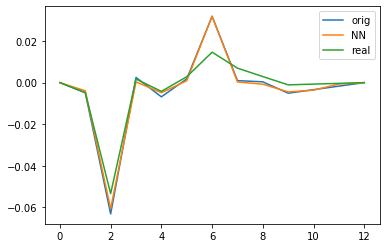

In [14]:
plt.plot(xticks,Y[39978,:],label='orig')
plt.plot(xticks,y_pred1[39978,:],label='NN')
plt.plot(xticks,sk05[12],label='real')
plt.legend()
plt.show()
    
